In [1]:
import os
import pandas as pd
import numpy as np
import scipy as st
import matplotlib.pyplot as plt
import pathlib as path


In [2]:
#marvel_vs_dc_df = pd.read_csv('Marvel Vs DC NEW.csv')
marvel_dc_movie_df = pd.read_csv('dc_marvel_movie_performance.csv')
#mcu_boxoffice_df = pd.read_csv('mcu_box_office.csv')

#merged_df = pd.merge(marvel_vs_dc_df, marvel_dc_movie_df, mcu_boxoffice_df, how = 'left', on=)

#merged_df.head()                     
marvel_dc_movie_df.dtypes


Film                                             object
U.S. release date                                object
Box office gross Domestic (U.S. and Canada )     object
Box office gross Other territories               object
Box office gross Worldwide                       object
Budget                                           object
MCU                                                bool
Phase                                           float64
Distributor                                      object
MPAA Rating                                      object
Length                                           object
Minutes                                           int64
Franchise                                        object
Character Family                                 object
Domestic %                                       object
Gross to Budget                                 float64
Rotten Tomatoes Critic Score                      int64
Male/Female-led                                 

In [3]:
#Marvel types

marvel_dc_movie_df.head()

#convert budget to float(int)
marvel_dc_movie_df['Budget'] = (
    marvel_dc_movie_df['Budget']
    .replace({'\\$': '', ',': ''}, regex=True)
    .astype(float)
)

#convert box office gross to float(int)
marvel_dc_movie_df['Box office gross Worldwide'] = (
    marvel_dc_movie_df['Box office gross Worldwide']
    .replace({'\\$': '', ',': ''}, regex=True)
    .astype(float)
)
marvel_dc_movie_df.head()

,Film,U.S. release date,Box office gross Domestic (U.S. and Canada ),Box office gross Other territories,Box office gross Worldwide,Budget,MCU,Phase,Distributor,MPAA Rating,...,Character Family,Domestic %,Gross to Budget,Rotten Tomatoes Critic Score,Male/Female-led,Year,Inflation Adjusted Worldwide Gross,Inflation Adjusted Budget,2.5x prod,Break Even
0,Superman,15/12/1978,"$134,478,449.00","$166,000,000.00",300478449.0,55000000.0,False,NaN,Warner Bros.,PG,...,Superman,45%,5.46,94,Male,1978,"$1,404,237,104.00","$257,033,544.00","$137,500,000.00",Success
1,Superman II,19/06/1981,"$108,185,706.00","$108,200,000.00",216385706.0,54000000.0,False,NaN,Warner Bros.,PG,...,Superman,50%,4.01,83,Male,1981,"$725,336,273.00","$181,010,842.00","$135,000,000.00",Success
2,Superman III,17/06/1983,"$59,950,623.00","$20,300,000.00",80250623.0,39000000.0,False,NaN,Warner Bros.,PG,...,Superman,75%,2.06,29,Male,1983,"$245,506,947.00","$119,310,861.00","$97,500,000.00",Flop
3,Supergirl,21/11/1984,"$14,296,438.00",NaN,14296438.0,35000000.0,False,NaN,Tri-Star Pictures,PG,...,Superman,100%,0.41,8,Female,1984,"$41,926,345.00","$102,642,497.00","$87,500,000.00",Flop
4,Howard the Duck,01/08/1986,"$16,295,774.00","$21,667,000.00",37962774.0,37000000.0,False,NaN,Universal Pictures,PG,...,Howard the Duck,43%,1.03,13,Male,1986,"$37,962,774.00","$37,000,000.00","$92,500,000.00",Flop


In [4]:
grouped_movie_df = marvel_dc_movie_df.groupby(['Franchise', 'Male/Female-led', 'Budget', 'Box office gross Worldwide', 
                                               'Rotten Tomatoes Critic Score'])
grouped_movies = pd.DataFrame(grouped_movie_df['Male/Female-led'].count())
grouped_movies

Male/Female-led
Franchise Male/Female-led Budget      Box office gross Worldwide Rotten Tomatoes Critic Score                 
DC        Co-starring     10000000.0  5.239024e+07               91                                          1
          Female          35000000.0  1.429644e+07               8                                           1
                          84500000.0  2.053728e+08               78                                          1
                          100000000.0 8.240238e+07               8                                           1
                          149000000.0 8.239707e+08               93                                          1
...                                                                                                        ...
Marvel    Male            250000000.0 1.405018e+09               76                                          1
                          258000000.0 8.949834e+08               63                                          1
                          294500000.0 9.557758e+08               73                                          1
                          325000000.0 2.052415e+09               85                                          1
                          356000000.0 2.799439e+09               94                                          1

[113 rows x 1 columns]

In [5]:
grouped_movies_rename = grouped_movies.rename(columns={'Male/Female-led': 'Total Male or Female Led Film'})
grouped_movies_rename

Total Male or Female Led Film
Franchise Male/Female-led Budget      Box office gross Worldwide Rotten Tomatoes Critic Score                               
DC        Co-starring     10000000.0  5.239024e+07               91                                                        1
          Female          35000000.0  1.429644e+07               8                                                         1
                          84500000.0  2.053728e+08               78                                                        1
                          100000000.0 8.240238e+07               8                                                         1
                          149000000.0 8.239707e+08               93                                                        1
...                                                                                                                      ...
Marvel    Male            250000000.0 1.405018e+09               76                                                        1
                          258000000.0 8.949834e+08               63                                                        1
                          294500000.0 9.557758e+08               73                                                        1
                          325000000.0 2.052415e+09               85                                                        1
                          356000000.0 2.799439e+09               94                                                        1

[113 rows x 1 columns]

In [6]:
grouped_movies_rename.index.names

FrozenList(['Franchise', 'Male/Female-led', 'Budget', 'Box office gross Worldwide', 'Rotten Tomatoes Critic Score'])

In [7]:
grouped_movies_rename.columns

Index(['Total Male or Female Led Film'], dtype='object')

In [8]:
grouped_movies_rename.reset_index(inplace=True)
grouped_movies_rename.head()

,Franchise,Male/Female-led,Budget,Box office gross Worldwide,Rotten Tomatoes Critic Score,Total Male or Female Led Film
0,DC,Co-starring,10000000.0,52390236.0,91,1
1,DC,Female,35000000.0,14296438.0,8,1
2,DC,Female,84500000.0,205372791.0,78,1
3,DC,Female,100000000.0,82402379.0,8,1
4,DC,Female,149000000.0,823970682.0,93,1


In [9]:
grouped_movie_df_count = marvel_dc_movie_df.groupby(['Franchise', 'Male/Female-led'])['Film'].count()
grouped_movie_df_count.head()

Franchise  Male/Female-led
DC         Co-starring         1
           Female              5
           Male               35
Marvel     Co-starring         3
           Female              8
Name: Film, dtype: int64

In [10]:
grouped_movie_df_franchiselist = marvel_dc_movie_df.groupby(['Franchise', 'Male/Female-led'])['Budget'].sum()
#grouped_movies = pd.DataFrame(grouped_movie_df['Male/Female-led'].rest_index())
grouped_movie_df_franchiselist

Franchise  Male/Female-led
DC         Co-starring        1.000000e+07
           Female             5.685000e+08
           Male               4.531600e+09
Marvel     Co-starring        4.290000e+08
           Female             1.428500e+09
           Male               9.275500e+09
Name: Budget, dtype: float64

In [11]:
figure_variable = pd.DataFrame(grouped_movie_df_franchiselist)
figure_variable.reset_index(inplace=True)
figure_variable

,Franchise,Male/Female-led,Budget
0,DC,Co-starring,1.000000e+07
1,DC,Female,5.685000e+08
2,DC,Male,4.531600e+09
3,Marvel,Co-starring,4.290000e+08
4,Marvel,Female,1.428500e+09
5,Marvel,Male,9.275500e+09


In [12]:
grouped_movie_df_count = marvel_dc_movie_df.groupby(['Franchise', 'Male/Female-led'])['Film'].count()
grouped_movie_df_count.head()

Franchise  Male/Female-led
DC         Co-starring         1
           Female              5
           Male               35
Marvel     Co-starring         3
           Female              8
Name: Film, dtype: int64

In [13]:
grouped_movie_df = marvel_dc_movie_df.groupby(['Franchise', 'Male/Female-led', 'Budget', 'Box office gross Worldwide', 'Rotten Tomatoes Critic Score'])
grouped_movies = pd.DataFrame(grouped_movie_df['Male/Female-led'].count())

In [14]:
grouped_movies_rename = grouped_movies.rename(columns={'Male/Female-led': 'Total Male or Female Led Film'})
grouped_movies_rename

Total Male or Female Led Film
Franchise Male/Female-led Budget      Box office gross Worldwide Rotten Tomatoes Critic Score                               
DC        Co-starring     10000000.0  5.239024e+07               91                                                        1
          Female          35000000.0  1.429644e+07               8                                                         1
                          84500000.0  2.053728e+08               78                                                        1
                          100000000.0 8.240238e+07               8                                                         1
                          149000000.0 8.239707e+08               93                                                        1
...                                                                                                                      ...
Marvel    Male            250000000.0 1.405018e+09               76                                                        1
                          258000000.0 8.949834e+08               63                                                        1
                          294500000.0 9.557758e+08               73                                                        1
                          325000000.0 2.052415e+09               85                                                        1
                          356000000.0 2.799439e+09               94                                                        1

[113 rows x 1 columns]

In [15]:
grouped_movies_rename.index.names

FrozenList(['Franchise', 'Male/Female-led', 'Budget', 'Box office gross Worldwide', 'Rotten Tomatoes Critic Score'])

In [16]:
grouped_movies_rename.columns

Index(['Total Male or Female Led Film'], dtype='object')

In [17]:
grouped_movies_rename.reset_index(inplace=True)
grouped_movies_rename.head()

,Franchise,Male/Female-led,Budget,Box office gross Worldwide,Rotten Tomatoes Critic Score,Total Male or Female Led Film
0,DC,Co-starring,10000000.0,52390236.0,91,1
1,DC,Female,35000000.0,14296438.0,8,1
2,DC,Female,84500000.0,205372791.0,78,1
3,DC,Female,100000000.0,82402379.0,8,1
4,DC,Female,149000000.0,823970682.0,93,1


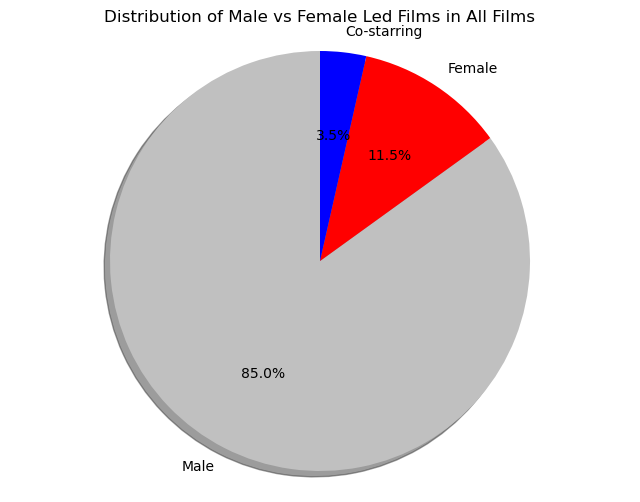

In [18]:
#generate pie chart VISUALIZATION #1
male_vs_female = grouped_movies_rename[['Franchise','Male/Female-led']]
male_female_counts = male_vs_female['Male/Female-led'].value_counts()
segment_colors = ["silver", "red", "blue"]
plt.figure(figsize=(8,6))
plt.pie(male_female_counts, labels=male_female_counts.index, colors= segment_colors, autopct='%1.1f%%', startangle=90, shadow=True, )
plt.title('Distribution of Male vs Female Led Films in All Films')
plt.axis('equal')
#plt.savefig(os.path.join('images','picture name.png'))
plt.show()

#need to drop co-starring

In [19]:
showlist = figure_variable.loc[(figure_variable["Male/Female-led"] == "Male"), :]
showlist.head()

,Franchise,Male/Female-led,Budget
2,DC,Male,4.531600e+09
5,Marvel,Male,9.275500e+09


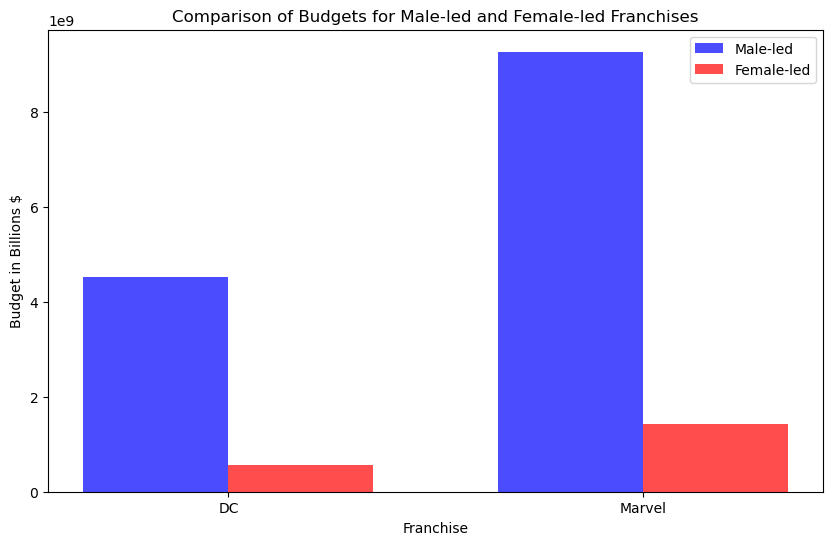

In [20]:
# Sample DataFrame similar to the one shown
data = {
    'Franchise': ['DC', 'Marvel'],
    'Male': [4.5316e9, 9.2755e9],
    'Female': [5.685e8, 1.4285e9]
}
df = pd.DataFrame(data)
# Set up the plot
fig, ax = plt.subplots(figsize=(10, 6))
# Define bar width and positions
bar_width = 0.35
indices = np.arange(len(df))
# Plot the Male-led bars
ax.bar(indices, df['Male'], width=bar_width, label='Male-led', color='blue', alpha=0.7)
# Plot the Female-led bars, slightly shifted to the right
ax.bar(indices + bar_width, df['Female'], width=bar_width, label='Female-led', color='red', alpha=0.7)
# Set labels and title
ax.set_xlabel('Franchise')
ax.set_ylabel('Budget in Billions $')
ax.set_title('Comparison of Budgets for Male-led and Female-led Franchises')
ax.set_xticks(indices + bar_width / 2)
ax.set_xticklabels(df['Franchise'])
# Add a legend
ax.legend()
# Show the plot
plt.savefig(os.path.join('images','picture name.png'))
plt.show()